# Document similarity - Jaccard

## Jaccard Distance

Jaccard Distance is a measure of how dissimilar two sets are.  The lower the distance, the more similar the two strings.
Jaccard Distance depends on another concept called “Jaccard Similarity Index” which is (the number in both sets) / (the number in either set) * 100



##  what is Jaccard Similarity

- The Jaccard index, also known as Intersection over Union and the Jaccard similarity coefficient

- Jaccard similarity or intersection over union is defined as size of intersection divided by size of union of two sets. Let’s take example of two sentences:

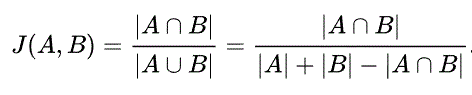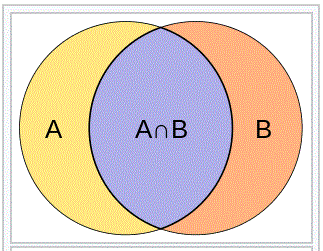

- The Jaccard distance, which measures dissimilarity between sample sets, is complementary to the Jaccard coefficient and is obtained by subtracting the Jaccard coefficient from 1



- Example
    - Sentence 1: AI is our friend and it has been friendly
    - Sentence 2: AI and humans have always been friendly

## For example, 

if we have two strings: “mapping” and “mappings”, the intersection of the two sets is 6 because there are 7 similar characters, but the “p” is repeated while we need a set, i.e. unique characters, and the union of the two sets is 7, 

so the 

    Jaccard Similarity Index is 6/7 = 0.857 and 
    the Jaccard Distance is 1 – 0.857 = 0.142

In [6]:
import nltk

In [7]:
w1 = set('mapping')
w2 = set('mappings')
 
nltk.jaccard_distance(w1, w2)

0.14285714285714285

In [1]:
import numpy as np
import pandas as pd

from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import re

from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# import plotting libraries
from mpl_toolkits.mplot3d.axes3d import Axes3D

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.preprocessing import normalize

In [2]:
# vectors
a = np.array([1,2,3])
b = np.array([1,1,4])

distance.jaccard(a, b)

0.6666666666666666

In [3]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    
    print(a)
    print(b)
    print(c)
    return float(len(c)) / (len(a) + len(b) - len(c))

str1 = 'AI is our friend and it has been friendly'
str2 = 'AI and humans have always been friendly'

get_jaccard_sim(str1, str2)

{'has', 'AI', 'friendly', 'and', 'it', 'friend', 'our', 'been', 'is'}
{'AI', 'friendly', 'and', 'always', 'humans', 'have', 'been'}
{'AI', 'friendly', 'been', 'and'}


0.3333333333333333

In [5]:
# compare with cosine similarity
documents = (
"AI is our friend and it has been friendly friendly friendly",
"AI and humans have always been friendly"
)

#tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer(tokenizer=stemming_tokenizer, 
                                   stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)

NameError: name 'stemming_tokenizer' is not defined

In [214]:
# using scipy jackard method
distance.jaccard(str1, str2)

C:\Anaconda3\lib\site-packages\scipy\spatial\distance.py:847: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  nonzero = np.bitwise_or(u != 0, v != 0)


1.0

Differences between Jaccard Similarity and Cosine Similarity:

Jaccard similarity takes only unique set of words for each sentence / document while cosine similarity takes total length of the vectors. (these vectors could be made from bag of words term frequency or tf-idf)

This means that if you repeat the word “friend” in Sentence 1 several times, cosine similarity changes but Jaccard similarity does not. For ex, if the word “friend” is repeated in the first sentence 50 times, cosine similarity drops to 0.4 but Jaccard similarity remains at 0.5.
Jaccard similarity is good for cases where duplication does not matter, cosine similarity is good for cases where duplication matters while analyzing text similarity.

# Hamming distance

Compute the Hamming distance between two 1-D arrays.

The Hamming distance between 1-D arrays u and v, is simply the proportion of disagreeing components in u and v.

In information theory, the Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the other.

In [3]:
data_dict = {'num_doors':   pd.Series(data= [2, 4, 2, 2]),
             'num_cyl':     pd.Series(data= [2, 3, 4, 8]),
             'cruise_ctrl': pd.Series(data= [0, 0, 1, 1]),
             'price_cat':   pd.Series(data= [1, 2, 2, 4])
            }

In [4]:
df = pd.DataFrame(data_dict)
df

,cruise_ctrl,num_cyl,num_doors,price_cat
0,0,2,2,1
1,0,3,4,2
2,1,4,2,2
3,1,8,2,4


In [10]:
a = df.iloc[1].values
b = df.iloc[2].values

In [11]:
a

array([0, 3, 4, 2], dtype=int64)

In [13]:
distance.hamming(a, b)

0.75

# scipy.spatial.distance.braycurtis - Dissimilarity

For a simple example, consider two aquariums;

Tank one: 6 goldfish, 7 guppies and 4 rainbow fish,
Tank two: 10 goldfish           and 6 rainbow fish.


To calculate Bray-Curtis,
- let’s first calculate Cij (the sum of only the lesser counts for each species found in both sites). 
- Goldfish are found on both sites; the lesser count is 6. 
- Guppies are only on one site, so they can’t be added in here. 
- Rainbow fish, though, are on both, and the lesser count is 4.

So Cij = 6 + 4 = 10.

Si (total number of specimens counted on site i) = 6 + 7 + 4 = 17, and
Sj (total number of specimens counted on site j) = 10 + 6 = 16.

So our BCij = 1 – (2 * 10) / (17 + 16), or 0.39.

** interpretation **

The Bray-Curtis dissimilarity is always a number between 0 and 1. 
- If 0, the two sites share all the same species; 
- if 1, they don’t share any species.

** Assumptions **

To calculate the Bray-Curtis dissimilarity between two sites you must assume that both sites are the same size, either in area or volume (as is relevant to species counts). 

This is because the equation doesn’t include any notion of space; it works only with the counts themselves.

If the two sites are not the same size, you will need to adjust your counts before doing the Bray-Curtis calculation.


[1, 0, 0]
[0, 1, 0]



 $ s = 1 - \frac{|p - q|}{n - 1}$

# Locality Sensitive Hashing 

pip install LocalitySensitiveHashing

A Python implementation of Locality Sensitive Hashing for finding nearest neighbors and clusters in multidimensional numerical data

- Locality Sensitive Hashing (LSH) is a computationally efficient approach for finding nearest neighbors in large datasets. 

- The main idea in LSH is to avoid having to compare every pair of data samples in a large dataset in order to find the nearest similar neighbors for the different data samples. 

- With LSH, one can expect a data sample and its closest similar neighbors to be hashed into the same bucket with a high probability. 

- By treating the data samples placed in the same bucket as candidates for similarity checking, we significantly reduce the computational burden associated with similarity detection in large datasets.

- While LSH algorithms have traditionally been used for finding nearest neighbors, this module goes a step further and explores using LSH for clustering the data. 

- Strictly speaking, this violates the basic mandate of LSH, which is to return just the nearest neighbors. (A data sample X being Y’s nearest neighbor and Y being Z’s nearest neighbor, in the sense neighbors are commonly defined with the Cosine metric in LSH, does not imply that X and Z will always be sufficiently close to be considered each other’s nearest neighbors.) 

- Random hyper-planes $h_1, h_2,...h_k$

- space sliced into $2^k regions (ploytopes) $

- compare x only to training points in the same region

- Complexity : O(kd + dn/$2^k$) = O(d.log(n)) vs O(dn)

- missed neighbors
    - repeat with different $h_1, h_2,...h_k$
